In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
from PIL import Image
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

In [2]:
classes = os.listdir('E:\\Plant Doc Disease Classification\\PlantDoc-Dataset-master\\train')
tclasses = os.listdir('E:\\Plant Doc Disease Classification\\PlantDoc-Dataset-master\\test')
print(tclasses)

['Apple leaf', 'Apple rust leaf', 'Apple Scab Leaf', 'Bell_pepper leaf', 'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Corn rust leaf', 'grape leaf', 'grape leaf black rot', 'Peach leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus', 'Tomato leaf yellow virus', 'Tomato mold leaf', 'Tomato Septoria leaf spot', 'Tomato two spotted spider mites leaf']


In [3]:
@tf.function
def img_array(path):
    train_data = []
    labels = []
    for c in classes:
        path = path
        i = classes.index(c)
        #path = os.path.join(path,c)
        for img in os.listdir(os.path.join(path,c)):
            
            im = cv.imread(os.path.join(os.path.join(path,c),img))
            print(os.path.join(path,img))
            #im = cv.resize(im, (128,128))
            if im is None:
                print("Image is empty: ", path)
                os.remove(os.path.join(path,img))
            else:
                im = cv.resize(im, (224, 224))
                im = im.astype(np.float32) / 255.0
            train_data.append(np.array(im))
            labels.append(np.array(c))
    train_data = np.array(train_data)
    labels = np.array(labels)
    return train_data, labels

train_rgb, train_lab_rgb = img_array(path = 'E:\\Plant Doc Disease Classification\\PlantDoc-Dataset-master\\train')
test_rgb, test_lab_rgb = img_array(path = 'E:\\Plant Doc Disease Classification\\PlantDoc-Dataset-master\\test')
train_lab, train_lab_lab = img_array(path = 'E:\\Plant Doc Disease Classification\\PlantDoc-Dataset-master\\gray_train')
test_lab, test_lab_lab = img_array(path = 'E:\\Plant Doc Disease Classification\\PlantDoc-Dataset-master\\gray_test')

Cause: Unable to locate the source code of <function join at 0x0000022722E68720>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function join at 0x0000022722E68720>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.auto

: 

: 

In [95]:
train_rgb

<tf.Tensor: shape=(1960, 224, 224, 3), dtype=uint8, numpy=
array([[[[ 73, 114,  98],
         [ 59, 111,  90],
         [ 49, 132, 102],
         ...,
         [106, 160, 116],
         [103, 160, 117],
         [ 59, 124,  84]],

        [[ 67, 114,  96],
         [ 70, 137, 113],
         [ 74, 168, 132],
         ...,
         [115, 168, 123],
         [ 98, 157, 111],
         [ 46, 119,  77]],

        [[ 73, 136, 111],
         [ 86, 169, 138],
         [ 83, 179, 145],
         ...,
         [113, 169, 126],
         [ 71, 139,  96],
         [ 37, 119,  76]],

        ...,

        [[ 47,  63,  62],
         [ 54,  68,  67],
         [ 63,  79,  77],
         ...,
         [ 69, 141,  95],
         [ 65, 142,  95],
         [ 60, 139,  94]],

        [[ 38,  49,  53],
         [ 41,  50,  55],
         [ 46,  56,  62],
         ...,
         [ 70, 142,  95],
         [ 67, 141,  96],
         [ 65, 142,  99]],

        [[ 36,  42,  47],
         [ 33,  36,  40],
         [ 31, 

In [99]:
train_rgb = tf.image.per_image_standardization(train_rgb)
train_lab = tf.image.per_image_standardization(train_lab)
test_rgb = tf.image.per_image_standardization(test_rgb)
test_lab =tf.image.per_image_standardization(test_lab)

ResourceExhaustedError: {{function_node __wrapped__Sub_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[1960,224,224,3] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:Sub]

In [96]:
train_rgb = train_rgb / 255.0
train_lab = train_lab / 255.0
test_rgb = test_rgb / 255.0
test_lab = test_lab / 255.0

TypeError: `x` and `y` must have the same dtype, got tf.uint8 != tf.float32.

In [47]:
lab = LabelEncoder()
encoded = lab.fit_transform(classes)
train_lab_rgb = lab.fit_transform(train_lab_rgb)
test_lab_rgb = lab.fit_transform(test_lab_rgb)
print(train_lab_rgb)

[ 1  1  1 ... 18 25 25]


In [87]:
rgb = tf.keras.layers.Input(shape=(224,224,3))
lab = tf.keras.layers.Input(shape=(224,224,3))

model1 = tf.keras.layers.Conv2D(32,kernel_size= (3,3), strides= (2,2), activation = 'relu')(rgb)
model1 = tf.keras.layers.MaxPooling2D((2,2))(model1)
model1 = tf.keras.layers.Conv2D(64,kernel_size= (3,3), strides= (2,2), activation = 'relu')(model1)
model1 = tf.keras.layers.MaxPooling2D((2,2))(model1)
model1 = tf.keras.layers.Conv2D(64,kernel_size= (3,3), strides= (2,2), activation = 'relu')(model1)
model1 = tf.keras.layers.MaxPooling2D((2,2))(model1)
out1 = tf.keras.layers.Flatten()(model1)
#model1 = tf.keras.Model(inputs = rgb, outputs = model1)

model2 = tf.keras.layers.Conv2D(32,kernel_size= (3,3), strides= (2,2), activation = 'relu')(lab)
model2 = tf.keras.layers.MaxPooling2D((2,2))(model2)
model2 = tf.keras.layers.Conv2D(64,kernel_size= (3,3), strides= (2,2), activation = 'relu')(model2)
model2 = tf.keras.layers.MaxPooling2D((2,2))(model2)
model2 = tf.keras.layers.Conv2D(64,kernel_size= (3,3), strides= (2,2), activation = 'relu')(model2)
model2 = tf.keras.layers.MaxPooling2D((2,2))(model2)
out2 = tf.keras.layers.Flatten()(model2)
#model2 = tf.keras.Model(inputs = lab, outputs = model2)

conc = tf.keras.layers.Concatenate()([out1, out2])

final = tf.keras.layers.BatchNormalization()(conc)
final = tf.keras.layers.Dense(64, activation= 'relu')(final)
final = tf.keras.layers.Dense(len(classes), activation= 'softmax')(final)

model = tf.keras.Model(inputs = [rgb, lab], outputs = final)

model.summary()


Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_31 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_32 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_64 (Conv2D)             (None, 111, 111, 32  896         ['input_31[0][0]']               
                                )                                                          

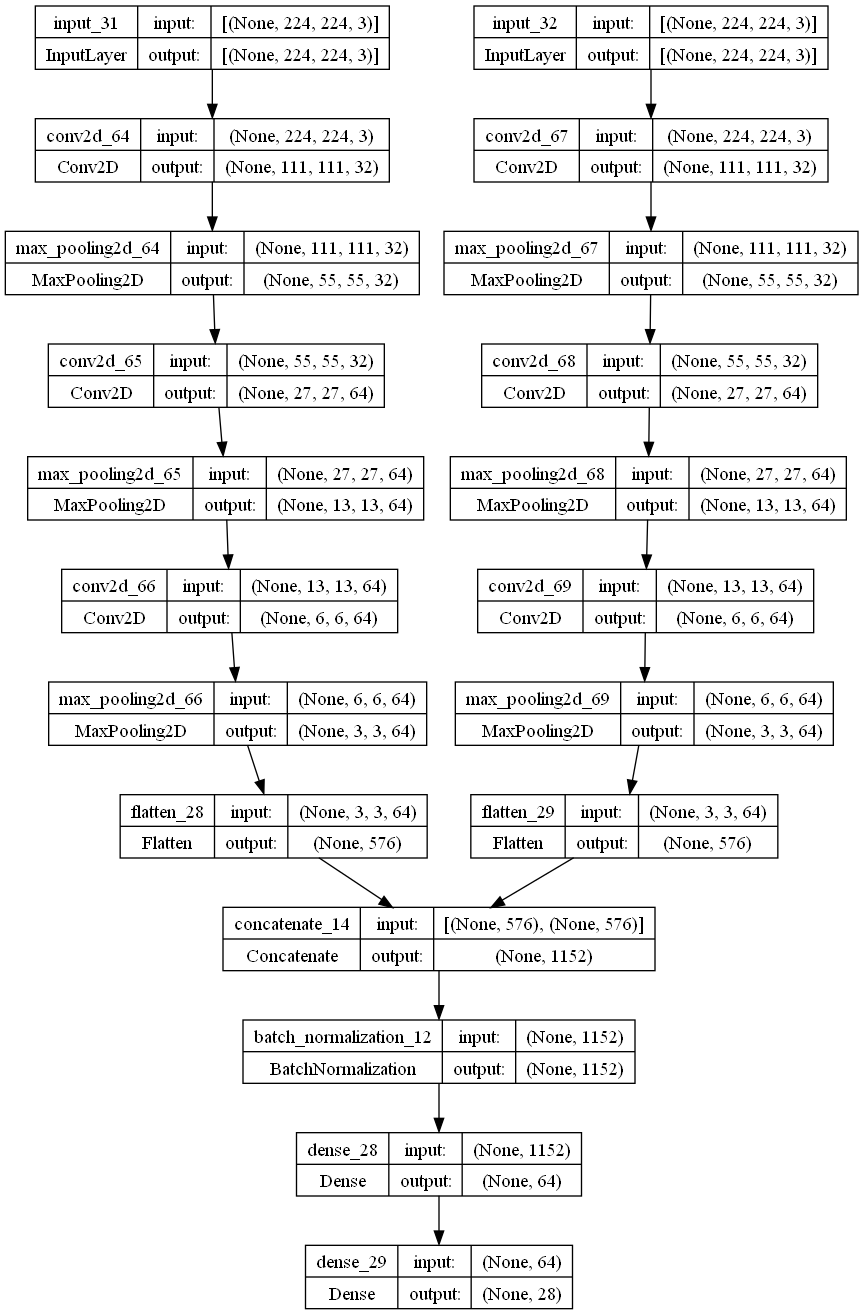

In [88]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [89]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['Accuracy'])

In [51]:
labels = tf.keras.utils.to_categorical(encoded, len(classes))
train_leb = tf.keras.utils.to_categorical(train_lab_rgb, len(classes))
test_leb = tf.keras.utils.to_categorical(test_lab_rgb, len(classes))
train_leb.shape

(1960, 28)

In [90]:
model.fit([train_rgb, train_lab], train_leb, epochs= 5, batch_size=64, validation_data= ([test_rgb, test_lab], test_leb), verbose=1)

Epoch 1/5
31/31 [==============================] - 63s 2s/step - loss: 3.3811 - Accuracy: 0.0832 - val_loss: 32.4164 - val_Accuracy: 0.0352
Epoch 2/5
31/31 [==============================] - 31s 997ms/step - loss: 2.8327 - Accuracy: 0.2026 - val_loss: 14.9467 - val_Accuracy: 0.0441
Epoch 3/5
31/31 [==============================] - 29s 943ms/step - loss: 2.5352 - Accuracy: 0.2694 - val_loss: 9.3795 - val_Accuracy: 0.0749
Epoch 4/5
31/31 [==============================] - 33s 1s/step - loss: 2.3259 - Accuracy: 0.3332 - val_loss: 5.9063 - val_Accuracy: 0.0485
Epoch 5/5
31/31 [==============================] - 35s 1s/step - loss: 2.0412 - Accuracy: 0.4464 - val_loss: 6.9253 - val_Accuracy: 0.0661


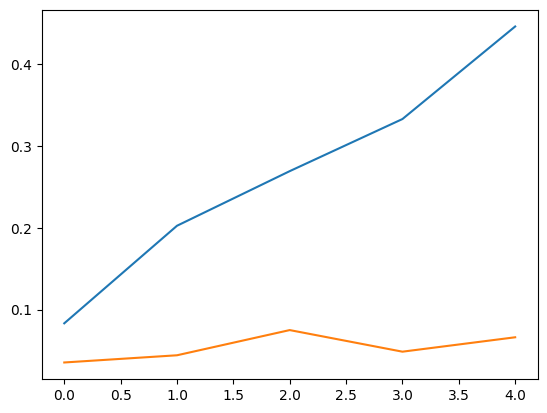

In [91]:
plt.plot(model.history.history['Accuracy'])
plt.plot(model.history.history['val_Accuracy'])

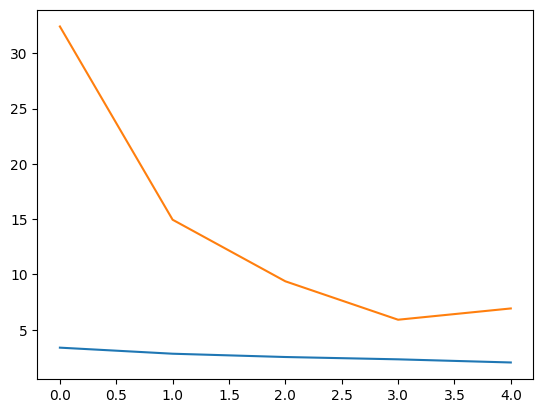

In [92]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

In [74]:
model.fit([train_rgb, train_lab], train_leb, epochs= 30, batch_size=64, validation_split= 0.2, verbose=1)

Epoch 1/30
25/25 [==============================] - 124s 5s/step - loss: 76.6309 - Accuracy: 0.0944 - val_loss: 513.7344 - val_Accuracy: 0.0000e+00
Epoch 2/30
 6/25 [======>.......................] - ETA: 1:41 - loss: 12.3635 - Accuracy: 0.2839

KeyboardInterrupt: 